In [328]:
import time

import matplotlib.pyplot as plt
import numpy as np

x = 0.15
y = 0.15
learning_rate = .0001

In [329]:
f = lambda x_, y_ : -np.log(1 - x_ - y_) - np.log(x_) - np.log(y_)
dom_x_y = lambda x_, y_: ((x_ + y_) < 1) and (x_ > 0) and (y_ > 0)

df_dx = lambda x_, y_: 1/(1 - x_ - y_) - (1/x)
df_dy = lambda x_, y_: 1/(1 - x_ - y_) - (1/y)

dff_dxdy = lambda x_, y_: 1/((1- x_ - y_)**2)
dff_dxdx = lambda x_, y_: 1/((1- x_ - y_)**2) + 1/(x**2)
dff_dydy = lambda x_, y_: 1/((1- x_ - y_)**2) + 1/(y**2)

In [330]:
weight = np.array([x,y])

energies = []
weights_x = []
weights_y = []
#dictionary with mapping energy: (x,y)
energies.append(f(weight[0],weight[1]))
weights_x.append(weight[0])
weights_y.append(weight[1])

start = time.perf_counter()
epoch = 0
while(True):
    epoch += 1
    gradient = np.array([df_dx(weight[0], weight[1]), df_dy(weight[0], weight[1])])
    
    weight = weight - (learning_rate * gradient)
    #print(weight)
    try:
        #log does not work on negative numbers. So the negativity part of domain is taken care
        energy = f(weight[0],weight[1])
    except ValueError:
        break
    #print(weight)
    #print(np.linalg.norm(weight - weight_temp))
    if (dom_x_y(weight[0], weight[1]) == False) or energy >= energies[-1]:
        break
    else:
        energies.append(energy)
        weights_x.append(weight[0])
        weights_y.append(weight[1])

end = time.perf_counter()
print("Gradient Descent")
print("Time Taken:", end-start)
print("Epochs: ",epoch)
print("Initial Weight: {0}\nFinal Weight: {1}".format([weights_x[0], weights_y[0]],[weights_x[-1], weights_y[-1]] ))

Gradient Descent
Time Taken: 0.006672299999991083
Epochs:  399
Initial Weight: [0.15, 0.15]
Final Weight: [0.3331807416684651, 0.3331807416684651]


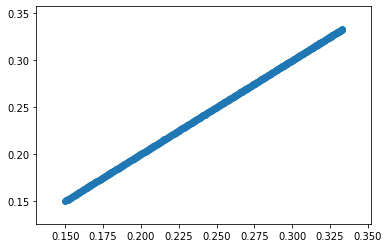

In [331]:
fig, ax = plt.subplots()
plt.scatter(weights_x, weights_y)
plt.show()

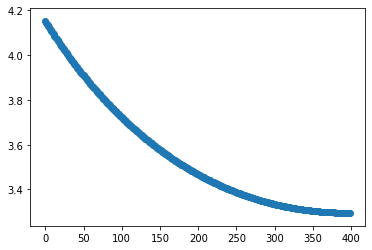

In [332]:
fig, ax = plt.subplots()
plt.scatter([i for i in range(len(energies))], energies)
plt.show()

In [333]:

weight2 = np.array([x,y])
start_2 = time.perf_counter()
epoch_2 = 0
weights_x2 = []
weights_y2 = []
energies2 = []
energies2.append(f(weight2[0],weight2[1]))
weights_x2.append(weight2[0])
weights_y2.append(weight2[1])

while(True):
    epoch_2 +=1
    gradient2 = np.array([df_dx(weight2[0], weight2[1]), df_dy(weight2[0], weight2[1])])
    hs_1 = dff_dxdx(weight2[0],weight2[1])
    hs_2 = dff_dxdy(weight2[0],weight2[1])
    hs_3 = dff_dxdy(weight2[0],weight2[1])
    hs_4 = dff_dydy(weight2[0],weight2[1])
    hessian = np.array([[hs_1, hs_2],[hs_3, hs_4]])
    hessian_inv = np.linalg.inv(hessian)
    weight2 = weight2 - (learning_rate * (gradient2 @ hessian_inv))
    try:
        #log does not work on negative numbers. So the negativity part of domain is taken care
        energy = f(weight2[0],weight2[1])
    except ValueError:
        break
    #print(weight)
    #print(np.linalg.norm(weight - weight_temp))
    if (dom_x_y(weight2[0], weight2[1]) == False) or energy >= energies2[-1]:
        #print("Breaking")
        break
    else:
        energies2.append(energy)
        weights_x2.append(weight2[0])
        weights_y2.append(weight2[1])

end_2 = time.perf_counter()
print("Newton Method")
print("Time Taken", end_2 - start_2 )    
print("Epochs:",epoch_2)
print("Initial Weight: {0}\nFinal Weight: {1}".format([weights_x2[0], weights_y2[0]],[weights_x2[-1], weights_y2[-1]] ))

Newton Method
Time Taken 3.087681099999827
Epochs: 21283
Initial Weight: [0.15, 0.15]
Final Weight: [0.333334926517191, 0.333334926517191]


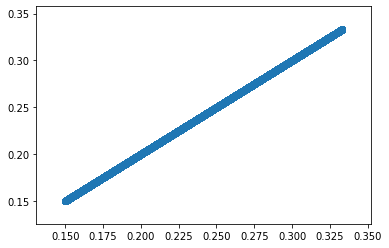

In [334]:
fig, ax = plt.subplots()
plt.scatter(weights_x2, weights_y2)
plt.show()



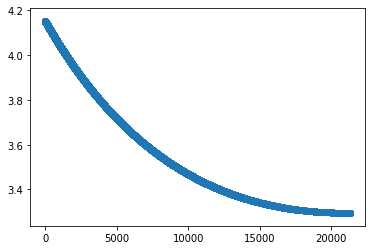

In [335]:
fig, ax = plt.subplots()
plt.scatter([i for i in range(len(energies2))], energies2)
plt.show()
